# Week5 - Lab

* Assign X, y
* Train-test split
* Visualize & speculate on training dataset
* Train a logistic regression model
* Evaluate the model, roc score
* Explain findings

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
# import seaborn as sns
from sklearn.linear_model import LogisticRegression
# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()
df

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow
...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,60000,Orange
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow


<AxesSubplot:>

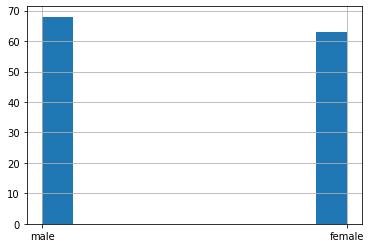

In [47]:
df.Gender.hist()

In [48]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [49]:
# sns.pairplot(df, hue='Gender')

In [57]:
numerical_vars = ['Age', 'Height (cm)', 'Weight (kg)', 'Income (USD)']
categorical_Vars = ['Occupation','Education Level', 'Marital Status', 'Favorite Color']

In [65]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    df[numerical_vars + categorical_Vars],
    df['Gender'],
    test_size=0.2,
    random_state=124
)

In [67]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_vars),
    ('cat', cat_pipeline, categorical_Vars)
])

In [68]:
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

logreg_pipeline.fit(Xtrain, ytrain)

train_preds = logreg_pipeline.predict(Xtrain)
test_preds = logreg_pipeline.predict(Xtest)

train_acc = accuracy_score(ytrain, train_preds)
test_acc = accuracy_score(ytest, test_preds)

print(f"Training accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Training accuracy: 1.0
Test accuracy: 1.0
